In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [2]:
# Classical Search
myList = [5,6,4,8,7,9,3,1,0,2]

In [3]:
def oracle(number):
    winningNumber = 8
    if number == winningNumber:
        return True
    else:
        return False

In [4]:
for idx, num in enumerate(myList):
    if oracle(num) is True:
        print("idx: ", idx)
        break

idx:  3


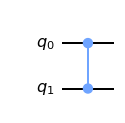

In [5]:
# Grover's Search Algorithm
# Oracle Circuit - WinningState 11

oracleCircuit = QuantumCircuit(2, name="oracleCircuit")
oracleCircuit.cz(0,1)
oracleCircuit.to_gate()
oracleCircuit.draw('mpl')

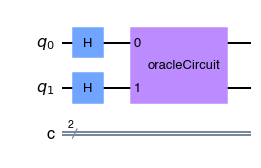

In [6]:
mainCircuit = QuantumCircuit(2,2)
mainCircuit.h([0,1])
mainCircuit.append(oracleCircuit, [0,1])
mainCircuit.draw('mpl')

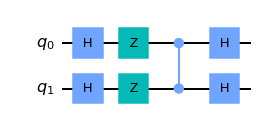

In [7]:
reflectionCircuit = QuantumCircuit(2, name="reflectionCircuit")
reflectionCircuit.h([0,1])
reflectionCircuit.z([0,1])
reflectionCircuit.cz(0,1)
reflectionCircuit.h([0,1])
reflectionCircuit.to_gate()
reflectionCircuit.draw('mpl')

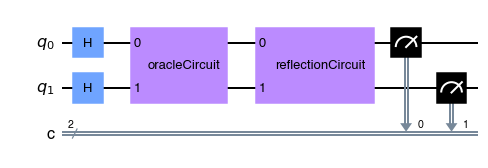

In [8]:
mainCircuit.append(reflectionCircuit, [0,1])
mainCircuit.measure([0,1], [0,1])
mainCircuit.draw('mpl')

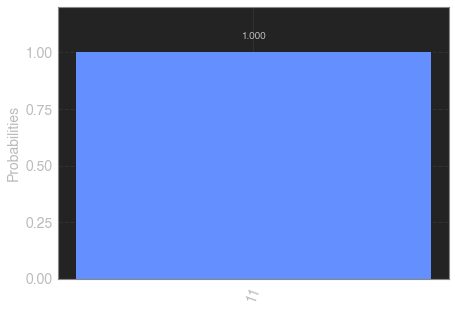

In [12]:
backend = Aer.get_backend('qasm_simulator')
result = execute(mainCircuit,backend=backend,shots=1).result()
counts = result.get_counts(mainCircuit)
plot_histogram([counts])

{'11': 1}


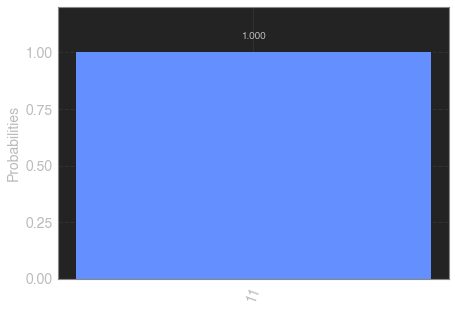

In [10]:
backend = Aer.get_backend('qasm_simulator')
result = execute(mainCircuit, backend=backend, shots=1).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)